# Lung Cancer Detection using Image Classification with CNN


In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [ ]:
project_name='l-cancer-images-2'

In [ ]:
!pip install opendatasets scikit-learn plotly folium --upgrade --quiet

import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: applefiya
Your Kaggle Key: ··········


100%|██████████| 199M/199M [00:11<00:00, 17.9MB/s]


In [ ]:
!rm /content/iqothnccd-lung-cancer-dataset/The\ IQ-OTHNCCD\ lung\ cancer\ dataset/The\ IQ-OTHNCCD\ lung\ cancer\ dataset/IQ-OTH_NCCD\ lung\ cancer\ dataset.txt

In [ ]:
import os
import shutil
import random

# Set the path of your original dataset
data_path = "/content/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset"

# Set the path of your new dataset
new_data_path = "/content/Image data"

# Set the split ratio
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Create the new directories for train, val, and test
train_dir = os.path.join(new_data_path, "train")
val_dir = os.path.join(new_data_path, "val")
test_dir = os.path.join(new_data_path, "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get a list of all the classes in your dataset
classes = os.listdir(data_path)

# Iterate through each class
for class_name in classes:
    # Create the new directories for each class in train, val, and test
    class_train_dir = os.path.join(train_dir, class_name)
    class_val_dir = os.path.join(val_dir, class_name)
    class_test_dir = os.path.join(test_dir, class_name)
    os.makedirs(class_train_dir, exist_ok=True)
    os.makedirs(class_val_dir, exist_ok=True)
    os.makedirs(class_test_dir, exist_ok=True)
    
    # Get a list of all the images in the current class
    images = os.listdir(os.path.join(data_path, class_name))
    
    # Shuffle the images
    random.shuffle(images)
    
    # Split the images into train, val, and test sets based on the split ratio
    train_split_index = int(len(images) * train_ratio)
    val_split_index = int(len(images) * (train_ratio + val_ratio))
    
    train_images = images[:train_split_index]
    val_images = images[train_split_index:val_split_index]
    test_images = images[val_split_index:]
    
    # Copy the images to the appropriate directories in the new dataset
    for image_name in train_images:
        shutil.copy(os.path.join(data_path, class_name, image_name), os.path.join(class_train_dir, image_name))
    for image_name in val_images:
        shutil.copy(os.path.join(data_path, class_name, image_name), os.path.join(class_val_dir, image_name))
    for image_name in test_images:
        shutil.copy(os.path.join(data_path, class_name, image_name), os.path.join(class_test_dir, image_name))


In [ ]:
# data_dir = './iqothnccd-lung-cancer-dataset'
data_dir = '/content/Image data'
print(os.listdir(data_dir))
classes = os.listdir(data_dir+'/train')
print(classes)

['val', 'test', 'train']
['Bengin cases', 'Malignant cases', 'Normal cases']


In [ ]:
# data_dir = 'Image data'

benign = os.listdir(data_dir + "/train/Bengin cases")
print('No. of training examples for benign cases:', len(benign))
print(benign[:5])

No. of training examples for benign cases: 96
['Bengin case (72).jpg', 'Bengin case (54).jpg', 'Bengin case (113).jpg', 'Bengin case (78).jpg', 'Bengin case (67).jpg']


In [ ]:
malignant = os.listdir(data_dir + "/test/Malignant cases")
print('No. of testing examples for malignant cases:', len(malignant))
print(malignant[:5])
malignant = os.listdir(data_dir + "/train/Malignant cases")
print('No. of training examples for malignant cases:', len(malignant))
print(malignant[:5])

No. of testing examples for malignant cases: 57
['Malignant case (522).jpg', 'Malignant case (378).jpg', 'Malignant case (35).jpg', 'Malignant case (324).jpg', 'Malignant case (139).jpg']
No. of training examples for malignant cases: 448
['Malignant case (195).jpg', 'Malignant case (457).jpg', 'Malignant case (222).jpg', 'Malignant case (215).jpg', 'Malignant case (470).jpg']


In [ ]:
normal = os.listdir(data_dir + "/train/Normal cases")
print('No. of training examples for normal cases:', len(normal))
print(normal[:5])

No. of training examples for normal cases: 332
['Normal case (26).jpg', 'Normal case (403).jpg', 'Normal case (65).jpg', 'Normal case (278).jpg', 'Normal case (356).jpg']


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
dataset = ImageFolder(data_dir+'/train', transform=b())

In [ ]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 512, 512]) 0


tensor([[[0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.1490],
         [0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.1490],
         [0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.1490],
         ...,
         [0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.1490],
         [0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.1490],
         [0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.1490]],

        [[0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.1490],
         [0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.1490],
         [0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.1490],
         ...,
         [0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.1490],
         [0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.1490],
         [0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.1490]],

        [[0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.1490],
         [0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.1490],
         [0.1490, 0.1490, 0.1490,  ..., 0.1490, 0.1490, 0.

In [ ]:
print(dataset.classes)

['Bengin cases', 'Malignant cases', 'Normal cases']


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Bengin cases (0)


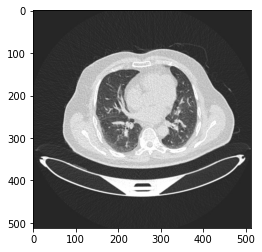

In [ ]:
show_example(*dataset[0])

Label:  Malignant cases (1)


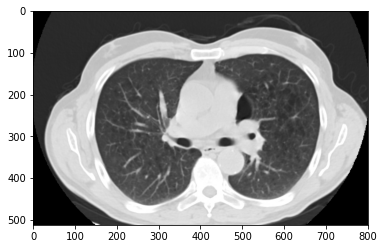

In [ ]:
show_example(*dataset[198])

In [ ]:
random_seed = 42
torch.manual_seed(random_seed);

In [ ]:
len(dataset)

876

In [ ]:
val_size = 76
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(800, 76)

In [ ]:
from torch.utils.data.dataloader import DataLoader

batch_size=16

In [ ]:
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
import PIL

In [ ]:
train_dir= '/content/Image data/train'
train_dataset = torchvision.datasets.ImageFolder(
    train_dir,
    transforms.Compose([
        transforms.RandomResizedCrop((512,512)),  # image size int or tuple
        # Add more transforms here
        transforms.ToTensor(),  # convert to tensor at the end
]))

train_dl = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
val_dir= '/content/Image data/val'
val_dataset = torchvision.datasets.ImageFolder(
    val_dir,
    transforms.Compose([
        transforms.RandomResizedCrop((512,512)),  # image size int or tuple
        # Add more transforms here
        transforms.ToTensor(),  # convert to tensor at the end
]))

val_dl = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
# train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
# val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots()
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

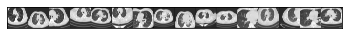

In [ ]:
show_batch(train_dl)

In [ ]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class LungModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 128 x 128

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 64 x 64

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 32 x 32

            nn.Flatten(), 
            # nn.Linear(256*4*4, 1024),
            # nn.ReLU(),
            nn.Linear(256*32*32, 16),
            nn.ReLU(),
            nn.Linear(16, 3)
            )
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = LungModel()
model

LungModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU()
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Flatten(start_dim=1, end_dim=-1)
    (17): Linear(in_feature

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)

    out = model(images)
    print('out.shape:', out.shape)
    # print('out[0]:', out[0])
    break

images.shape: torch.Size([16, 3, 512, 512])
out.shape: torch.Size([16, 3])


To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required. These are described in more detail in the [previous tutorial](https://jovian.ml/aakashns/04-feedforward-nn#C21).

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where you're running this notebook, your default device could be a CPU (`torch.device('cpu')`) or a GPU (`torch.device('cuda')`)

In [ ]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available), and use `to_device` to move our model to the GPU (if available).

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

Once again, let's save and commit the notebook before we proceed further.

## Training the Model

We'll define two functions: `fit` and `evaluate` to train the model using gradient descent and evaluate its performance on the validation set. For a detailed walkthrough of these functions, check out the [previous tutorial](https://jovian.ai/aakashns/03-logistic-regression).

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before we begin training, let's instantiate the model once again and see how it performs on the validation set with the initial set of parameters.

In [ ]:
model = to_device(LungModel(), device)

In [ ]:
evaluate(model, val_dl)

{'val_loss': 1.045470118522644, 'val_acc': 0.5063775777816772}

The initial accuracy is around 50%, which is what one might expect from a randomly intialized model.

We'll use the following *hyperparmeters* (learning rate, no. of epochs, batch_size etc.) to train our model. As an exercise, you can try changing these to see if you have achieve a higher accuracy in a shorter time. 

In [ ]:
!pip install jovian --upgrade -q
import jovian
jovian.commit(project=project_name)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
import torch
num_epochs = 10
opt_func = torch.optim.Adam
#(model.parameters(), lr=lr, momentum=0.9)
lr = 0.01
# opt_func  = torch.optim.SGD


It's important to record the hyperparameters of every experiment you do, to replicate it later and compare it against other experiments. We can record them using `jovian.log_hyperparams`.

In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 34.8925, val_loss: 0.9550, val_acc: 0.5089
Epoch [1], train_loss: 0.9553, val_loss: 0.9547, val_acc: 0.5064
Epoch [2], train_loss: 0.9547, val_loss: 0.9555, val_acc: 0.5089
Epoch [3], train_loss: 0.9537, val_loss: 0.9512, val_acc: 0.5128
Epoch [4], train_loss: 0.9535, val_loss: 0.9554, val_acc: 0.5089
Epoch [5], train_loss: 0.9531, val_loss: 0.9546, val_acc: 0.5064
Epoch [6], train_loss: 0.9538, val_loss: 0.9512, val_acc: 0.5128
Epoch [7], train_loss: 0.9541, val_loss: 0.9554, val_acc: 0.5089
Epoch [8], train_loss: 0.9535, val_loss: 0.9535, val_acc: 0.5102
Epoch [9], train_loss: 0.9546, val_loss: 0.9523, val_acc: 0.5089


In [ ]:
lr=0.1
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.9732, val_loss: 0.9578, val_acc: 0.5089
Epoch [1], train_loss: 0.9576, val_loss: 0.9539, val_acc: 0.5089
Epoch [2], train_loss: 0.9586, val_loss: 0.9585, val_acc: 0.5077
Epoch [3], train_loss: 0.9591, val_loss: 0.9531, val_acc: 0.5115
Epoch [4], train_loss: 0.9602, val_loss: 0.9701, val_acc: 0.3814
Epoch [5], train_loss: 0.9670, val_loss: 0.9564, val_acc: 0.5051
Epoch [6], train_loss: 0.9588, val_loss: 0.9567, val_acc: 0.5077
Epoch [7], train_loss: 0.9611, val_loss: 0.9679, val_acc: 0.5064
Epoch [8], train_loss: 0.9684, val_loss: 0.9892, val_acc: 0.3801
Epoch [9], train_loss: 0.9593, val_loss: 0.9690, val_acc: 0.5051


Just as we have recorded the hyperparameters, we can also record the final metrics achieved by the model using `jovian.log_metrics` for reference, analysis and comparison.

In [ ]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


We can also plot the valdation set accuracies to study how the model improves over time.

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history)

Initialy, both the training and validation losses seem to decrease over time. However, if you train the model for long enough, you will notice that the training loss continues to decrease, while the validation loss stops decreasing, and even starts to increase after a certain point! 

<img src="https://i.stack.imgur.com/1QU0m.png" style="max-width:400px;">

This phenomenon is called **overfitting**, and it is the no. 1 why many machine learning models give rather terrible results on real-world data. It happens because the model, in an attempt to minimize the loss, starts to learn patters are are unique to the training data, sometimes even memorizing specific training examples. Because of this, the model does not generalize well to previously unseen data.


Following are some common stragegies for avoiding overfitting:

- Gathering and generating more training data, or adding noise to it
- Using regularization techniques like batch normalization & dropout
- Early stopping of model's training, when validation loss starts to increase

We will cover these topics in more detail in the next tutorial in this series, and learn how we can reach an accuracy of **over 90%** by making minor but important changes to our model.

Before continuing, let us save our work to the cloud using `jovian.commit`.

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Saving and loading the model

Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights of the model to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [ ]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model. To load the model weights, we can redefine the model with the same structure, and use the `.load_state_dict` method.

In [ ]:
model2 = to_device(LungModel(), device)

In [ ]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before.

In [ ]:
evaluate(model2, test_loader)

{'val_loss': 0.9666368365287781, 'val_acc': 0.761523425579071}

Let's make one final commit using `jovian`.

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
